<a href="https://colab.research.google.com/github/SerHol17/ClaseMaestria/blob/main/Pendulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Liberias e hiperparametros

In [ ]:
#Librerias

import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
#Hiperparametros

In [ ]:
L = 0.13  #Longitud (mts)
g = 9.81  #Gravedad (mts/s2)
theta_0_deg = [8,40]  # ángulo inicial en grados para mostrar diferencias significativas
theta_0 = np.deg2rad(theta_0_deg)  # Convertir ángulo inicial a radianes
omega_0 = 0

#Funciones para hallar las ecuaciones diferenciales y metodos numericos.

In [ ]:
def mas(t, theta_m, omega_n, phi):
    # Convertir t de milisegundos a segundos
    t = t / 1000
    # Convertir omega_n de rad/s a ciclos/periodo y luego a grados
    omega_n = np.degrees(omega_n)
    return theta_m * np.sin(np.radians(omega_n * t + phi))

def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Solución analítica
def theta_analytical(t):
    return theta_0 * np.cos(np.sqrt(g / l) * t)



# Solución analítica en grados
def theta_analytical_deg(t):
    return np.rad2deg(theta_0) * np.cos(np.sqrt(g / l) * t)

#Angulo pequeño (8 grados)

In [ ]:
df=pd.read_excel("/content/Data_T010.xlsx")

In [ ]:
df=pd.DataFrame(df)
times = df["Tiempo (ms)"].to_numpy()
angles = df["Ãngulo 1"].to_numpy()

Frecuencia angular natural ajustada: 7.539661459298349 grados/s


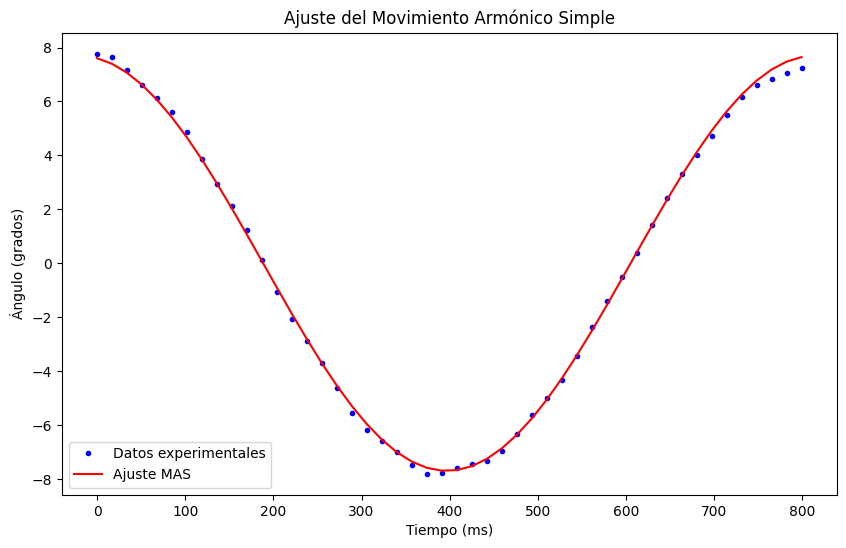

In [ ]:

popt, pcov = curve_fit(mas, times, angles, p0=[max(angles), 2 * np.pi / 0.8, 0])

theta_m_opt, omega_n_opt, phi_opt = popt

print(f"Frecuencia angular natural ajustada: {omega_n_opt} grados/s")

# Graficar los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(times, angles, 'b.', label='Datos experimentales')
plt.plot(times, mas(times, *popt), 'r-', label='Ajuste MAS')
plt.title('Ajuste del Movimiento Armónico Simple')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.show()


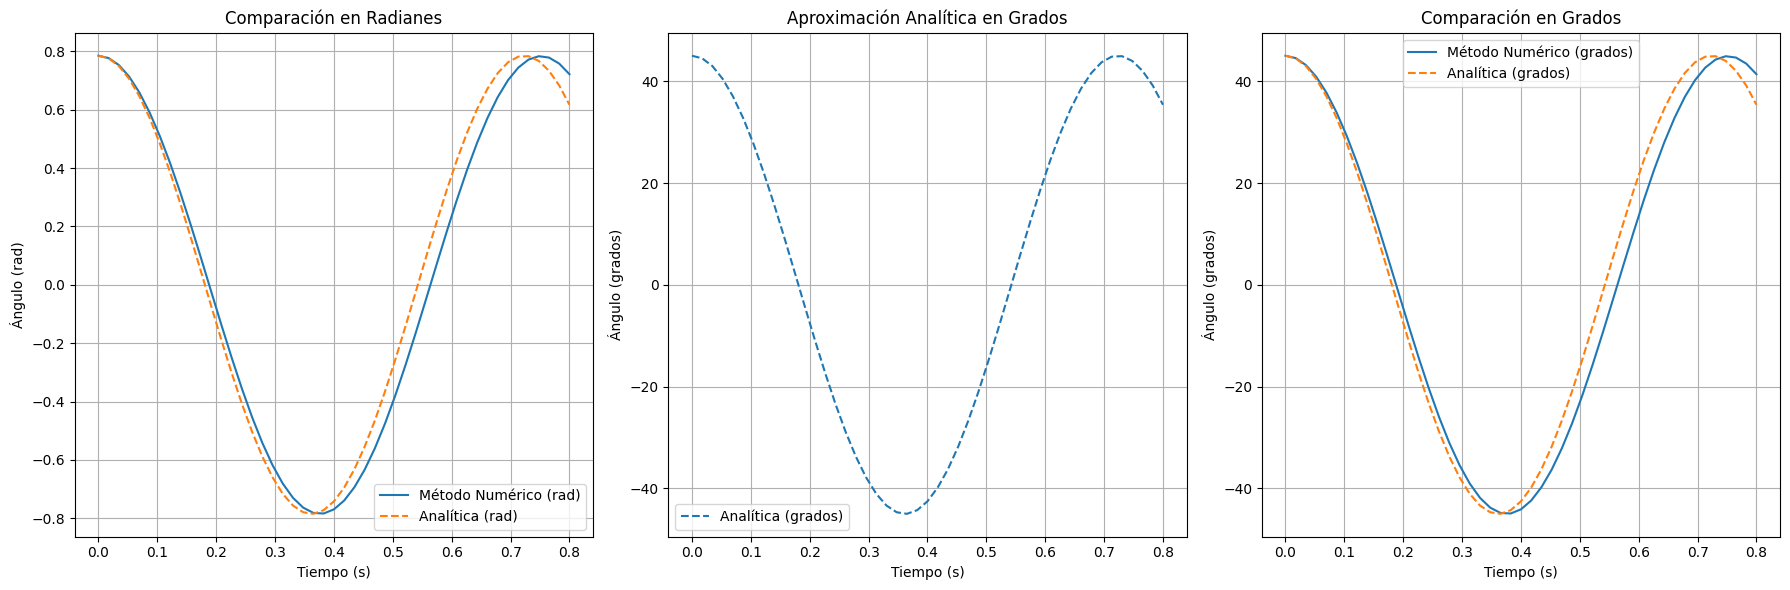

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constantes


# Función para el método numérico
#def pendulum(t, y):
#    theta, omega = y
#    dtheta_dt = omega
#    domega_dt = -(g / l) * np.sin(theta)
#    return [dtheta_dt, domega_dt]

# Solución analítica en radianes


# Tiempos
t_span = (0, 0.8)
t_eval = np.linspace(*t_span, 47)

# Solución numérica
sol = solve_ivp(pendulum, t_span, [theta_0, omega_0], t_eval=t_eval)

# Convertir la solución numérica a grados
sol_y_deg = np.rad2deg(sol.y[0])

# Gráfica de comparación en radianes
plt.figure(figsize=(18, 6))


plt.plot(sol.t, sol_y_deg, label='Método Numérico (grados)')
plt.plot(t_eval, theta_analytical_deg(t_eval), '--', label='Analítica (grados)')
plt.title('Comparación en Grados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
